In [1]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Taxi-v3')
env.reset()
env.render()

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\toy_text\taxi.py:314: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("Taxi-v3", render_mode="rgb_array")
  gym.logger.warn(


In [3]:
num_rows = env.observation_space.n
num_columns = env.action_space.n
qtable = np.zeros((num_rows,num_columns))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [4]:
#hyperparameters
episodes = 10000
alpha = 0.5 #learning rate
gamma = 0.9 #discount factor
epsilon = 1 #exploration factor
        

In [10]:
outcomes = []


#going through episodes: 
for epi in range(episodes):
    state=env.reset()
    state = state[0]

    done = False
    
    curr_outcome = "Failiure"
    outcomes.append(curr_outcome)
    
    while not done:
        #choose action between random or most benefitial: 
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
            
        else:
            action = np.argmax(qtable[state])
        

        #while action is hapenning
        new_state,reward,truncated,terminated,info = env.step(action)
        
        done = truncated or terminated
        
        #qtable updating
        qtable[state,action] = qtable[state,action] + alpha*(reward + gamma*np.max(qtable[new_state])-qtable[state,action])
        
        #updating current state
        state = new_state
        
        #updating outcome 
        if reward == 20:
            outcomes[-1]="Successful"

print("Qtable after reaching the end of training: \n")
print(qtable)

Qtable after reaching the end of training: 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.58568212  0.4603532  -0.58568212  0.4603532   1.62261467 -8.5396468 ]
 [ 4.348907    5.94323     4.348907    5.94323     7.7147     -3.05677   ]
 ...
 [ 7.7147      9.683       7.7147      5.94323    -1.2853     -1.2853    ]
 [ 1.62261467  2.9140163   1.62261467  2.9140163  -7.37738533 -7.37738533]
 [14.3        11.87       14.3        17.          5.3         5.3       ]]


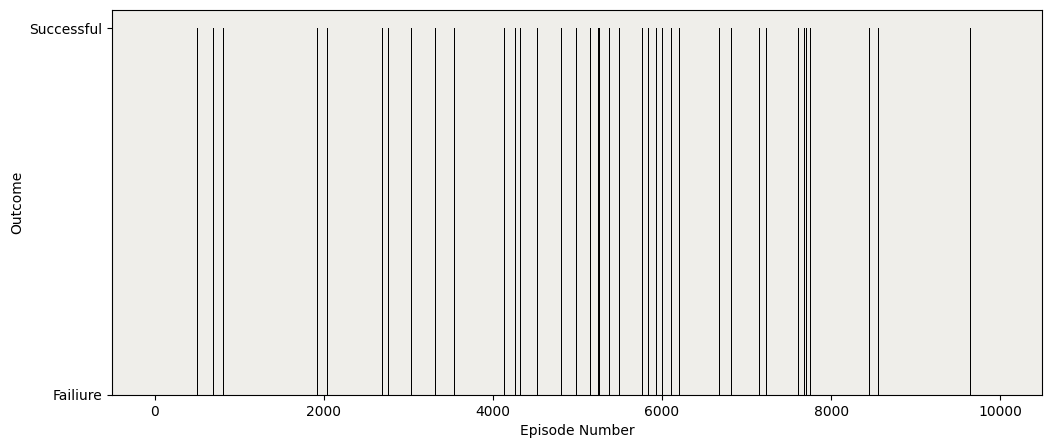

In [11]:
plt.figure(figsize=(12,5))
plt.xlabel("Episode Number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)),outcomes,color="black",width = 1)
plt.show()